In [27]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from currency_converter import CurrencyConverter
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import  RandomForestRegressor
#from keras.layers import Dense,BatchNormalization,Flatten
#from keras.models import Sequential
#import keras
#from keras.metrics import mean_absolute_error
warnings.filterwarnings('ignore')
playstore=pd.read_csv('dataset.csv')
playstore.head(5)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Free,Price,Currency,...,Ad Supported,In app purchases,Editor Choice,Summary,Reviews,Android version Text,Developer,Developer Address,Developer Internal ID,Version
0,Logistics Management,com.eniseistudio.logistics_management,Education,4.090909,66.0,"10,000+",10000.0,True,0.0,USD,...,True,False,False,Leading Online Learning and Training System in...,28.0,4.0 and up,eniseistudio,"7115 N Muscatel Ave San Gabriel, CA 91775 Unit...",4.656447e+18,1.1.5
1,Estados Unidos Noticias,com.eniseistudio.news.estados_unidos,News & Magazines,4.000000,8.0,"1,000+",1000.0,True,0.0,USD,...,True,False,False,Top Stories\r\nWorld\r\nEntertainment\r\nSport...,3.0,4.0 and up,eniseistudio,"7115 N Muscatel Ave San Gabriel, CA 91775 Unit...",4.656447e+18,1.2.3
2,Dental Assistant,com.eniseistudio.dental_assistant,Education,3.866667,15.0,"10,000+",10000.0,True,0.0,USD,...,True,False,False,"Dental Assistant: Study Dental Assistant, Dent...",3.0,4.0 and up,eniseistudio,"7115 N Muscatel Ave San Gabriel, CA 91775 Unit...",4.656447e+18,1.1.5
3,Medical Assistant,com.eniseistudio.course.medical_assistant,Education,4.000000,18.0,"5,000+",5000.0,True,0.0,USD,...,True,False,False,Medical Assistant Degree Medical Assistant Job...,7.0,4.0 and up,eniseistudio,"7115 N Muscatel Ave San Gabriel, CA 91775 Unit...",4.656447e+18,1.1.4
4,Business Administration,com.eniseistudio.majors.course.business_admini...,Education,4.023256,86.0,"50,000+",50000.0,True,0.0,USD,...,True,False,False,"Business Administration Learning, Business Adm...",29.0,4.0 and up,eniseistudio,"7115 N Muscatel Ave San Gabriel, CA 91775 Unit...",4.656447e+18,1.1.6


In [28]:
playstore.describe()

,Rating,Rating Count,Minimum Installs,Price,Reviews,Developer Internal ID
count,123496.000000,8.876100e+04,1.245800e+05,124508.000000,1.234960e+05,1.245800e+05
mean,2.964190,3.182438e+04,1.631095e+06,0.291912,8.170749e+03,6.926441e+18
std,1.907904,5.906035e+05,4.938170e+07,3.073606,1.864213e+05,1.357545e+18
min,0.000000,5.000000e+00,0.000000e+00,0.000000,0.000000e+00,4.612309e+18
25%,0.000000,2.500000e+01,1.000000e+02,0.000000,0.000000e+00,5.746679e+18
50%,3.950000,1.540000e+02,5.000000e+03,0.000000,1.500000e+01,6.912364e+18
75%,4.371429,1.720000e+03,1.000000e+05,0.000000,2.310000e+02,8.130049e+18
max,5.000000,1.080669e+08,5.000000e+09,399.990000,3.799872e+07,9.223355e+18


In [29]:
playstore.describe(include='all')

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Free,Price,Currency,...,Ad Supported,In app purchases,Editor Choice,Summary,Reviews,Android version Text,Developer,Developer Address,Developer Internal ID,Version
count,124580,124588,124580,123496.000000,8.876100e+04,124509,1.245800e+05,124508,124508.000000,124508,...,95998,124588,124588,124561,1.234960e+05,124320,124580,91535,1.245800e+05,124513
unique,121460,124588,48,NaN,NaN,21,NaN,2,NaN,38,...,1,2,2,117417,NaN,47,9450,7131,NaN,10778
top,Solitaire,in.codehound.tellmewhen,Education,NaN,NaN,"10,000+",NaN,True,NaN,USD,...,True,False,False,Download and enjoy your new application totall...,NaN,4.1 and up,Flipdish,"EduGorilla Community Pvt. Ltd\n12/651, First F...",NaN,1
freq,35,1,13551,NaN,NaN,18740,NaN,115712,NaN,107811,...,95998,89091,124179,132,NaN,35559,150,643,NaN,15801
mean,NaN,NaN,NaN,2.964190,3.182438e+04,NaN,1.631095e+06,NaN,0.291912,NaN,...,NaN,NaN,NaN,NaN,8.170749e+03,NaN,NaN,NaN,6.926441e+18,NaN
std,NaN,NaN,NaN,1.907904,5.906035e+05,NaN,4.938170e+07,NaN,3.073606,NaN,...,NaN,NaN,NaN,NaN,1.864213e+05,NaN,NaN,NaN,1.357545e+18,NaN
min,NaN,NaN,NaN,0.000000,5.000000e+00,NaN,0.000000e+00,NaN,0.000000,NaN,...,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,4.612309e+18,NaN
25%,NaN,NaN,NaN,0.000000,2.500000e+01,NaN,1.000000e+02,NaN,0.000000,NaN,...,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,5.746679e+18,NaN
50%,NaN,NaN,NaN,3.950000,1.540000e+02,NaN,5.000000e+03,NaN,0.000000,NaN,...,NaN,NaN,NaN,NaN,1.500000e+01,NaN,NaN,NaN,6.912364e+18,NaN
75%,NaN,NaN,NaN,4.371429,1.720000e+03,NaN,1.000000e+05,NaN,0.000000,NaN,...,NaN,NaN,NaN,NaN,2.310000e+02,NaN,NaN,NaN,8.130049e+18,NaN


In [30]:
playstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124588 entries, 0 to 124587
Data columns (total 29 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   App Name               124580 non-null  object 
 1   App Id                 124588 non-null  object 
 2   Category               124580 non-null  object 
 3   Rating                 123496 non-null  float64
 4   Rating Count           88761 non-null   float64
 5   Installs               124509 non-null  object 
 6   Minimum Installs       124580 non-null  float64
 7   Free                   124508 non-null  object 
 8   Price                  124508 non-null  float64
 9   Currency               124508 non-null  object 
 10  Size                   124579 non-null  object 
 11  Minimum Android        124320 non-null  object 
 12  Developer Id           124580 non-null  object 
 13  Developer Website      101891 non-null  object 
 14  Developer Email        124579 non-nu

### The least important columns like App Id, Developer Website,etc are deleted

In [31]:
playstore.drop(['App Id','Developer Id','Developer Website','Developer Email','Privacy Policy','Android version Text','Developer','Developer Address','Developer Internal ID'],axis=1,inplace=True)
playstore.head()

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Free,Price,Currency,Size,Minimum Android,Released,Last update,Content Rating,Ad Supported,In app purchases,Editor Choice,Summary,Reviews,Version
0,Logistics Management,Education,4.090909,66.0,"10,000+",10000.0,True,0.0,USD,5.8M,4,"Jul 19, 2017","July 19, 2017",Everyone,True,False,False,Leading Online Learning and Training System in...,28.0,1.1.5
1,Estados Unidos Noticias,News & Magazines,4.000000,8.0,"1,000+",1000.0,True,0.0,USD,5.3M,4,"May 5, 2017","May 5, 2017",Everyone,True,False,False,Top Stories\r\nWorld\r\nEntertainment\r\nSport...,3.0,1.2.3
2,Dental Assistant,Education,3.866667,15.0,"10,000+",10000.0,True,0.0,USD,5.7M,4,"Jul 18, 2017","July 18, 2017",Everyone,True,False,False,"Dental Assistant: Study Dental Assistant, Dent...",3.0,1.1.5
3,Medical Assistant,Education,4.000000,18.0,"5,000+",5000.0,True,0.0,USD,5.8M,4,"Jun 24, 2017","June 24, 2017",Everyone,True,False,False,Medical Assistant Degree Medical Assistant Job...,7.0,1.1.4
4,Business Administration,Education,4.023256,86.0,"50,000+",50000.0,True,0.0,USD,5.7M,4,"Jun 13, 2017","October 6, 2017",Everyone,True,False,False,"Business Administration Learning, Business Adm...",29.0,1.1.6


### Train test spliting of data

In [37]:
from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(playstore,test_size=0.15,random_state=42)

### Dealing with missing values

In [40]:
for col in train_data.columns:
    null=train_data[col].isnull().sum()
    print('{0} have {1}   null value'.format(col,null))

App Name have 8   null value
Category have 8   null value
Rating have 929   null value
Rating Count have 30415   null value
Installs have 64   null value
Minimum Installs have 8   null value
Free have 65   null value
Price have 65   null value
Currency have 65   null value
Size have 9   null value
Minimum Android have 239   null value
Released have 1038   null value
Last update have 0   null value
Content Rating have 8   null value
Ad Supported have 24353   null value
In app purchases have 0   null value
Editor Choice have 0   null value
Summary have 23   null value
Reviews have 929   null value
Version have 64   null value


In [41]:
train_data.fillna(method='bfill',inplace=True)

### Categorical type columns

In [42]:
categorical_columns=[]
for col in train_data.columns:
    if train_data[col].dtype=='O':
        categorical_columns.append(col)
categorical_columns

['App Name',
 'Category',
 'Installs',
 'Currency',
 'Size',
 'Minimum Android',
 'Released',
 'Last update',
 'Content Rating',
 'Summary',
 'Version']

### Installs

In [43]:
def string_to_numeric(data):
    data=data.replace(',','')
    data=data[:-1]
    return int(data)

train_data['Installs']=train_data['Installs'].apply(string_to_numeric)

[]

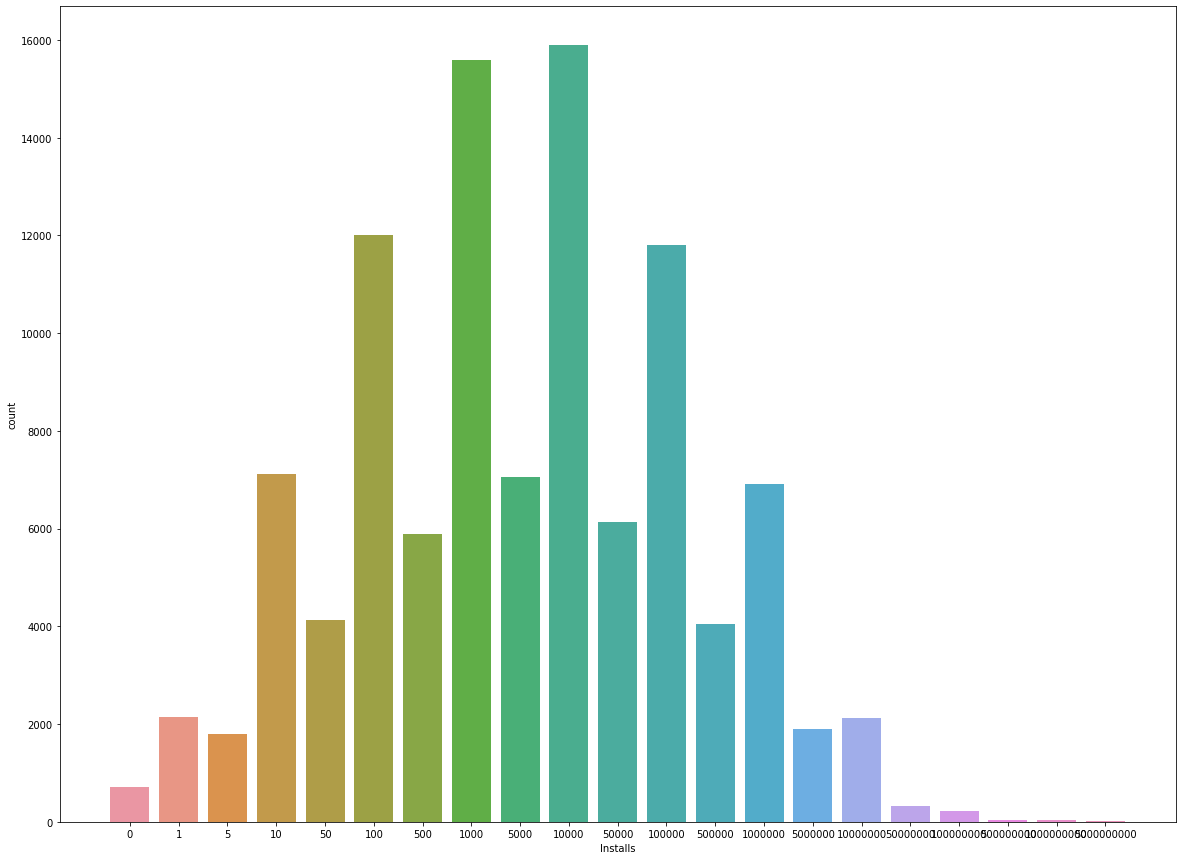

In [44]:
plt.figure(figsize=(20,15))
sns.countplot(train_data['Installs'])
plt.plot()

### Size of App

In [45]:
def define_size(data):
    data=data.replace(',','')
    num=data[:-1]
    if data[-1]=='K' or data[-1]=='k' :
        return float(num)
    elif data[-1]=='M' or data[-1]=='m':
        return float(num)*1000
    elif data[-1]=='G' or data[-1]=='g':
        return float(num)*1000000
    else:
        return 1000

##### Function to convert every size of App to 

In [46]:
train_data['Size']=train_data['Size'].apply(define_size)

[]

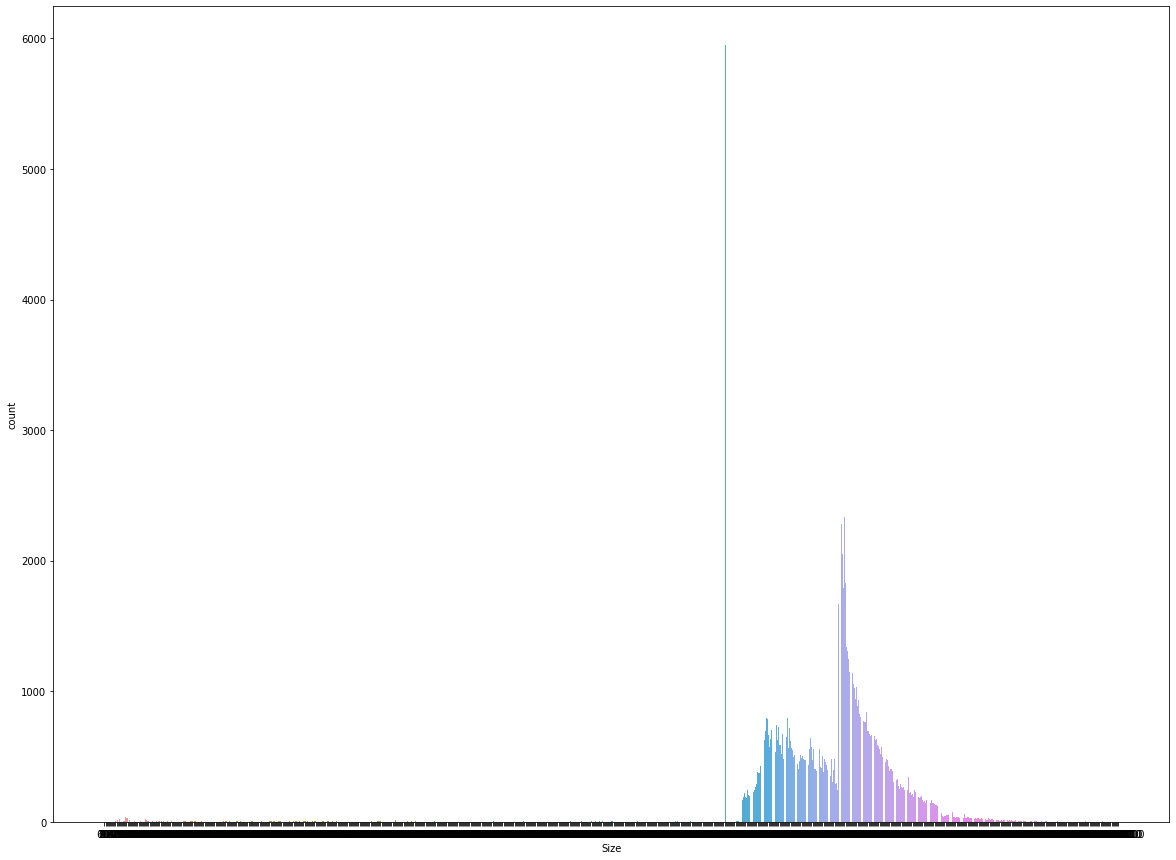

In [47]:
plt.figure(figsize=(20,15))
sns.countplot(train_data['Size'])
plt.plot()

[]

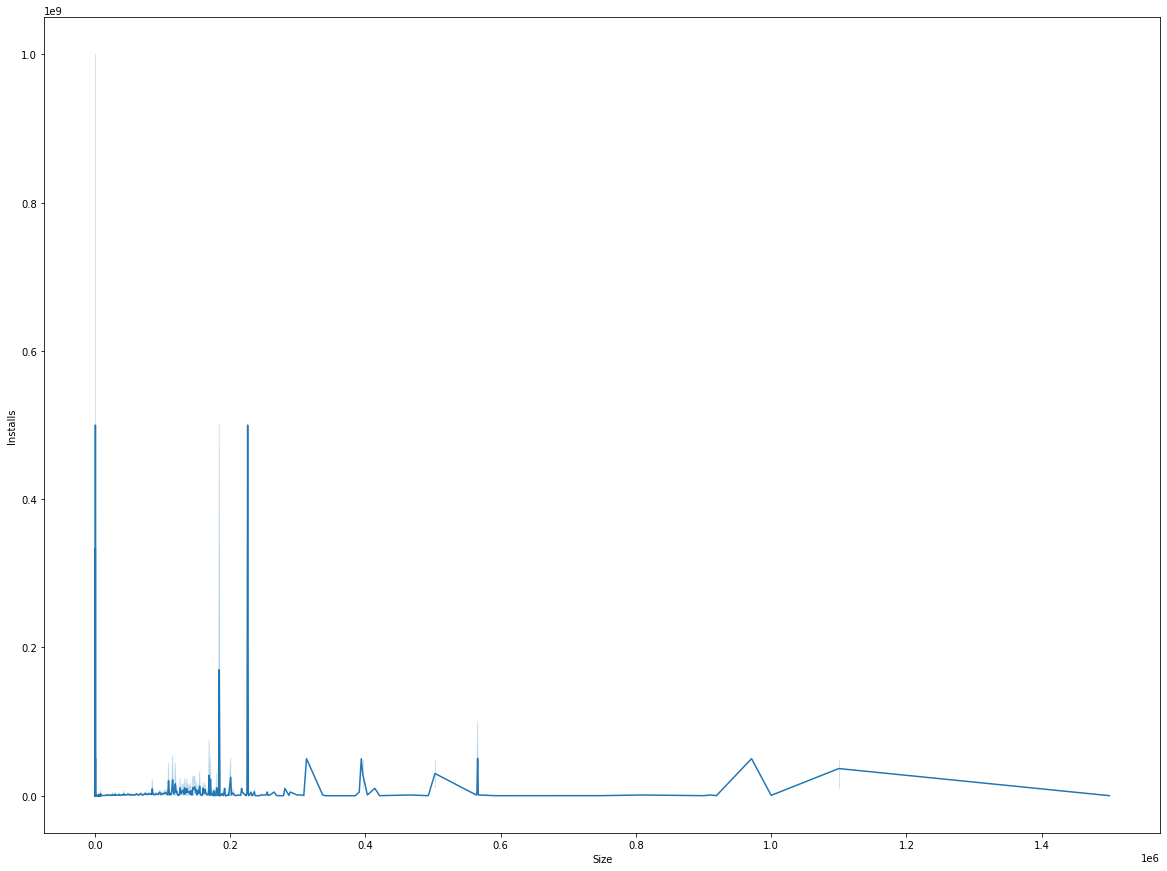

In [48]:
plt.figure(figsize=(20,15))
sns.lineplot(train_data['Size'],train_data['Installs'])
plt.plot()